In [5]:
from PIL import Image

# Load the image
input_image_path = '/Users/martinnwadiugwu/Downloads/ValidationPics/ROSMAP_BA46_unaffected_canonical_pathway.png'
img = Image.open(input_image_path)

# Set new resolution (for example, increasing by 2x)
new_width = img.width * 4
new_height = img.height * 4

# Resize the image using LANCZOS for high-quality downscaling
resized_img = img.resize((new_width, new_height), Image.LANCZOS)

# Save the resized image
#output_image_path = '/mnt/data/resized_image.png'
#resized_img.save(output_image_path)

# Display the new resolution of the image
resized_img.show()


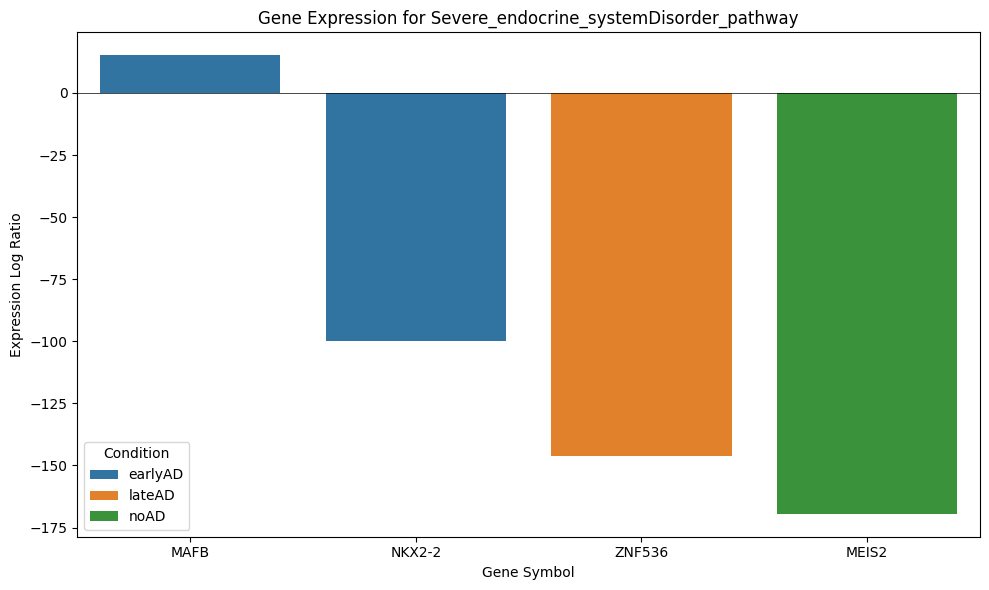

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data for each pathway and condition (earlyAD, lateAD, noAD)
data = {
    'Gene Symbol': ['MAFB', 'NKX2-2', 'ZNF536', 'MEIS2'],
    'Condition': ['earlyAD', 'earlyAD', 'lateAD', 'noAD'],
    'Expr Log Ratio': [15.187, -99.88, -146.209, -169.449],
    'Pathway': ['Severe_endocrine_systemDisorder_pathway'] * 4
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create the visualization for each pathway
def visualize_pathway(pathway_name, df):
    plt.figure(figsize=(10, 6))
    subset = df[df['Pathway'] == pathway_name]
    
    # Plot using seaborn barplot
    sns.barplot(x='Gene Symbol', y='Expr Log Ratio', hue='Condition', data=subset)
    
    plt.title(f'Gene Expression for {pathway_name}')
    plt.ylabel('Expression Log Ratio')
    plt.xlabel('Gene Symbol')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.legend(title='Condition')
    plt.tight_layout()
    plt.show()

# Visualize a specific pathway
visualize_pathway('Severe_endocrine_systemDisorder_pathway', df)


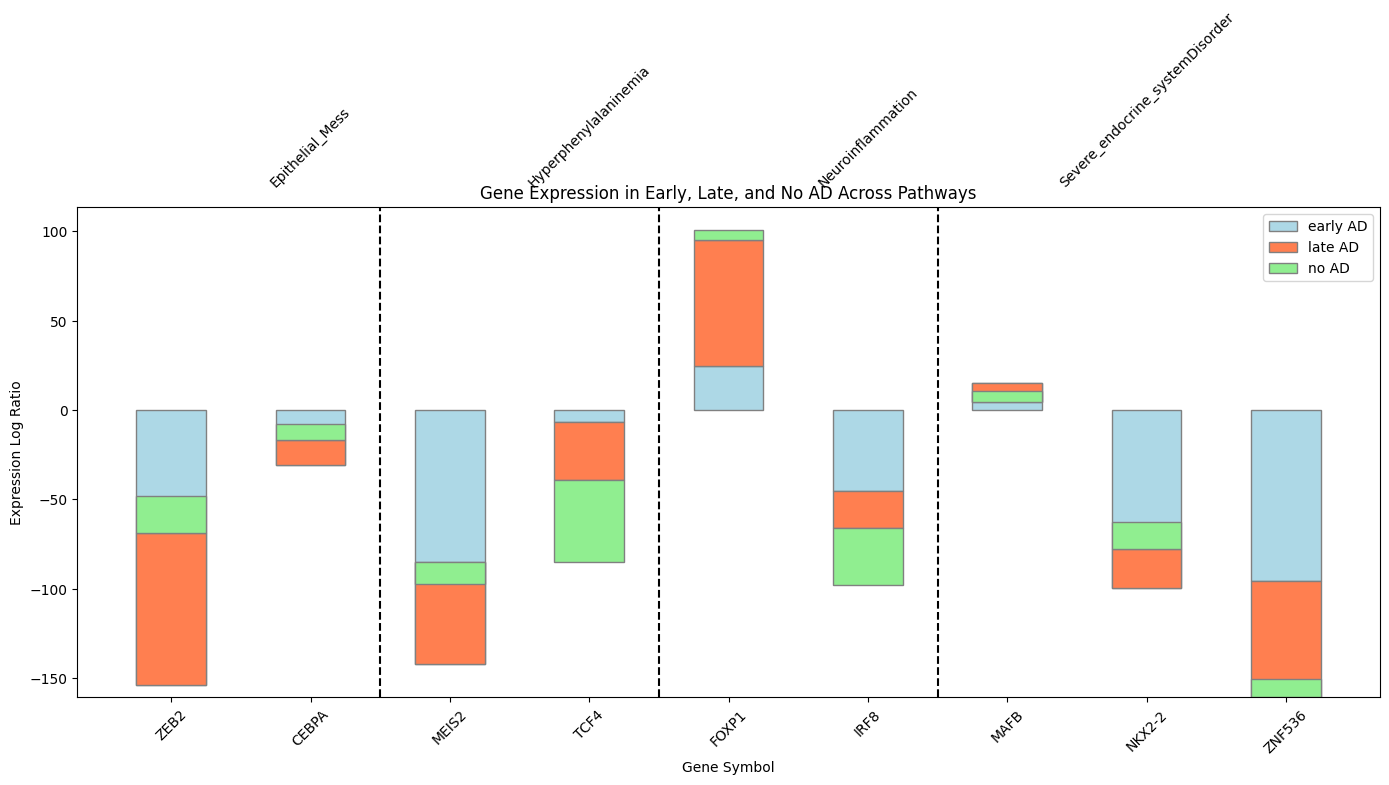

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Updated sample data structure to incorporate other pathways
data = {
    'Gene Symbol': ['MAFB', 'NKX2-2', 'ZNF536', 'MEIS2', 'TCF4', 'ZEB2', 'FOXP1', 'IRF8', 'CEBPA'],
    'Pathway': ['Severe_endocrine_systemDisorder', 'Severe_endocrine_systemDisorder', 
                'Severe_endocrine_systemDisorder', 'Hyperphenylalaninemia', 
                'Hyperphenylalaninemia', 'Epithelial_Mess', 'Neuroinflammation', 'Neuroinflammation', 'Epithelial_Mess'],
    'earlyAD': [15.187, -99.88, -95.765, -142.134, -6.946, -154.171, 24.65, -45.33, -30.9],
    'lateAD': [-10.5, 22.3, -65.2, 56.9, -32.4, 85.1, 70.4, -20.5, 14.2],
    'noAD': [5.7, 14.8, 10.2, -12.3, -45.6, 20.8, 5.5, -32.1, 9.1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort data by Pathway to group genes by pathway
df = df.sort_values(by='Pathway').reset_index(drop=True)

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Number of genes
genes = df['Gene Symbol']
barWidth = 0.5

# Plot stacked bars
earlyAD = df['earlyAD']
lateAD = df['lateAD']
noAD = df['noAD']

# Bottom for stacking
bar1 = earlyAD
bar2 = lateAD + earlyAD
bar3 = noAD + lateAD + earlyAD

# Plotting the bars
ax.bar(genes, earlyAD, color='lightblue', edgecolor='grey', label='early AD', width=barWidth)
ax.bar(genes, lateAD, bottom=earlyAD, color='coral', edgecolor='grey', label='late AD', width=barWidth)
ax.bar(genes, noAD, bottom=lateAD + earlyAD, color='lightgreen', edgecolor='grey', label='no AD', width=barWidth)

# Add vertical lines to separate pathways
for i in range(1, len(df)):
    if df['Pathway'].iloc[i] != df['Pathway'].iloc[i - 1]:
        ax.axvline(x=i - 0.5, color='black', linestyle='--')

# Add pathway names as annotations
pathways = df['Pathway'].unique()

# Calculate the middle position for each pathway group
pathway_positions = [df[df['Pathway'] == pathway].index[len(df[df['Pathway'] == pathway]) // 2] for pathway in pathways]

for i, pathway in enumerate(pathways):
    ax.text(pathway_positions[i], ax.get_ylim()[1] + 10, pathway, ha='center', va='bottom', rotation=45, fontsize=10, color='black')

# Add labels and legend
ax.set_xlabel('Gene Symbol')
ax.set_ylabel('Expression Log Ratio')
ax.set_title('Gene Expression in Early, Late, and No AD Across Pathways')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


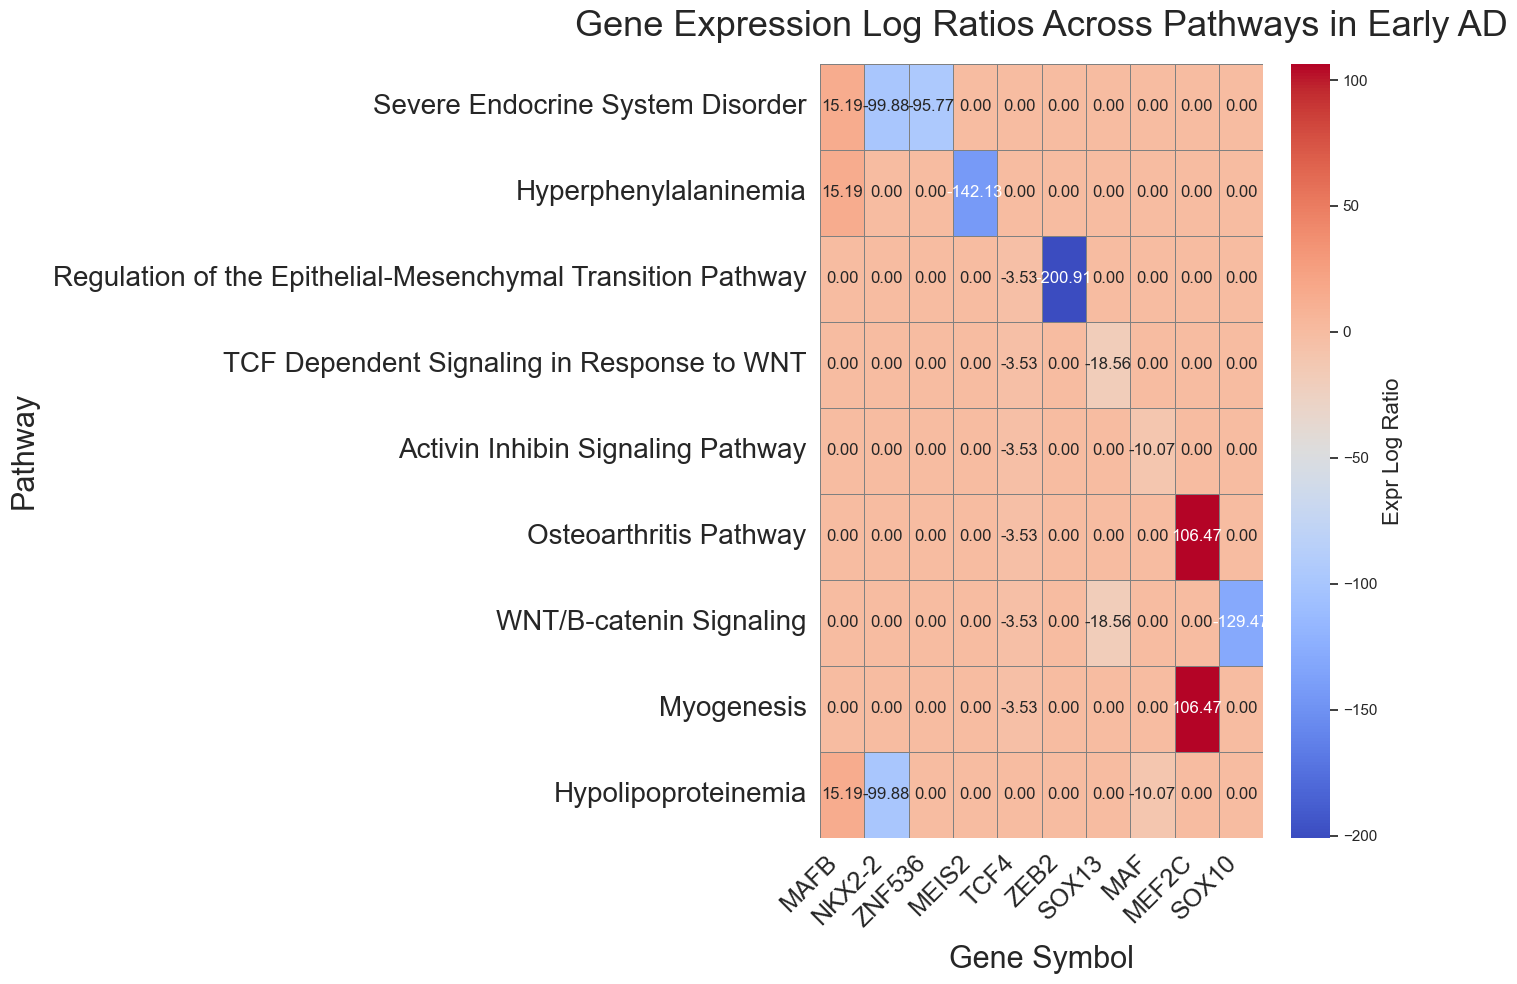

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = {
    'Pathway': [
        'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder',
        'Hyperphenylalaninemia', 'Hyperphenylalaninemia',
        'Regulation of the Epithelial-Mesenchymal Transition Pathway', 'Regulation of the Epithelial-Mesenchymal Transition Pathway',
        'TCF Dependent Signaling in Response to WNT', 'TCF Dependent Signaling in Response to WNT',
        'Activin Inhibin Signaling Pathway', 'Activin Inhibin Signaling Pathway',
        'Osteoarthritis Pathway', 'Osteoarthritis Pathway',
        'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling',
        'Myogenesis', 'Myogenesis',
        'Hypolipoproteinemia', 'Hypolipoproteinemia', 'Hypolipoproteinemia'
    ],
    'Gene Symbol': [
        'MAFB', 'NKX2-2', 'ZNF536',
        'MAFB', 'MEIS2',
        'TCF4', 'ZEB2',
        'SOX13', 'TCF4',
        'MAF', 'TCF4',
        'MEF2C', 'TCF4',
        'SOX10', 'SOX13', 'TCF4',
        'MEF2C', 'TCF4',
        'MAF', 'MAFB', 'NKX2-2'
    ],
    'Expr Log Ratio': [
        15.187, -99.88, -95.765,
        15.187, -142.134,
        -3.531, -200.909,
        -18.559, -3.531,
        -10.07, -3.531,
        106.465, -3.531,
        -129.475, -18.559, -3.531,
        106.465, -3.531,
        -10.07, 15.187, -99.88
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a matrix for the heatmap
pathways = df['Pathway'].unique()
genes = df['Gene Symbol'].unique()
matrix = np.zeros((len(pathways), len(genes)))

for i, pathway in enumerate(pathways):
    for j, gene in enumerate(genes):
        value = df[(df['Pathway'] == pathway) & (df['Gene Symbol'] == gene)]['Expr Log Ratio']
        if not value.empty:
            matrix[i, j] = value.values[0]

# Create DataFrame for the heatmap
heatmap_df = pd.DataFrame(matrix, index=pathways, columns=genes)

# Set up the figure and color map
plt.figure(figsize=(14, 10))
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the heatmap
heatmap = sns.heatmap(heatmap_df, cmap=cmap, annot=True, fmt='.2f', cbar_kws={'label': 'Expr Log Ratio'}, linewidths=0.5, linecolor='gray')

# Customize the plot for a polished look
plt.title("Gene Expression Log Ratios Across Pathways in Early AD", fontsize=26, pad=20)
plt.xlabel("Gene Symbol", fontsize=22, labelpad=10)
plt.ylabel("Pathway", fontsize=22, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=20)

# Add a colorbar with label
cbar = heatmap.collections[0].colorbar
cbar.set_label("Expr Log Ratio", fontsize=16)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


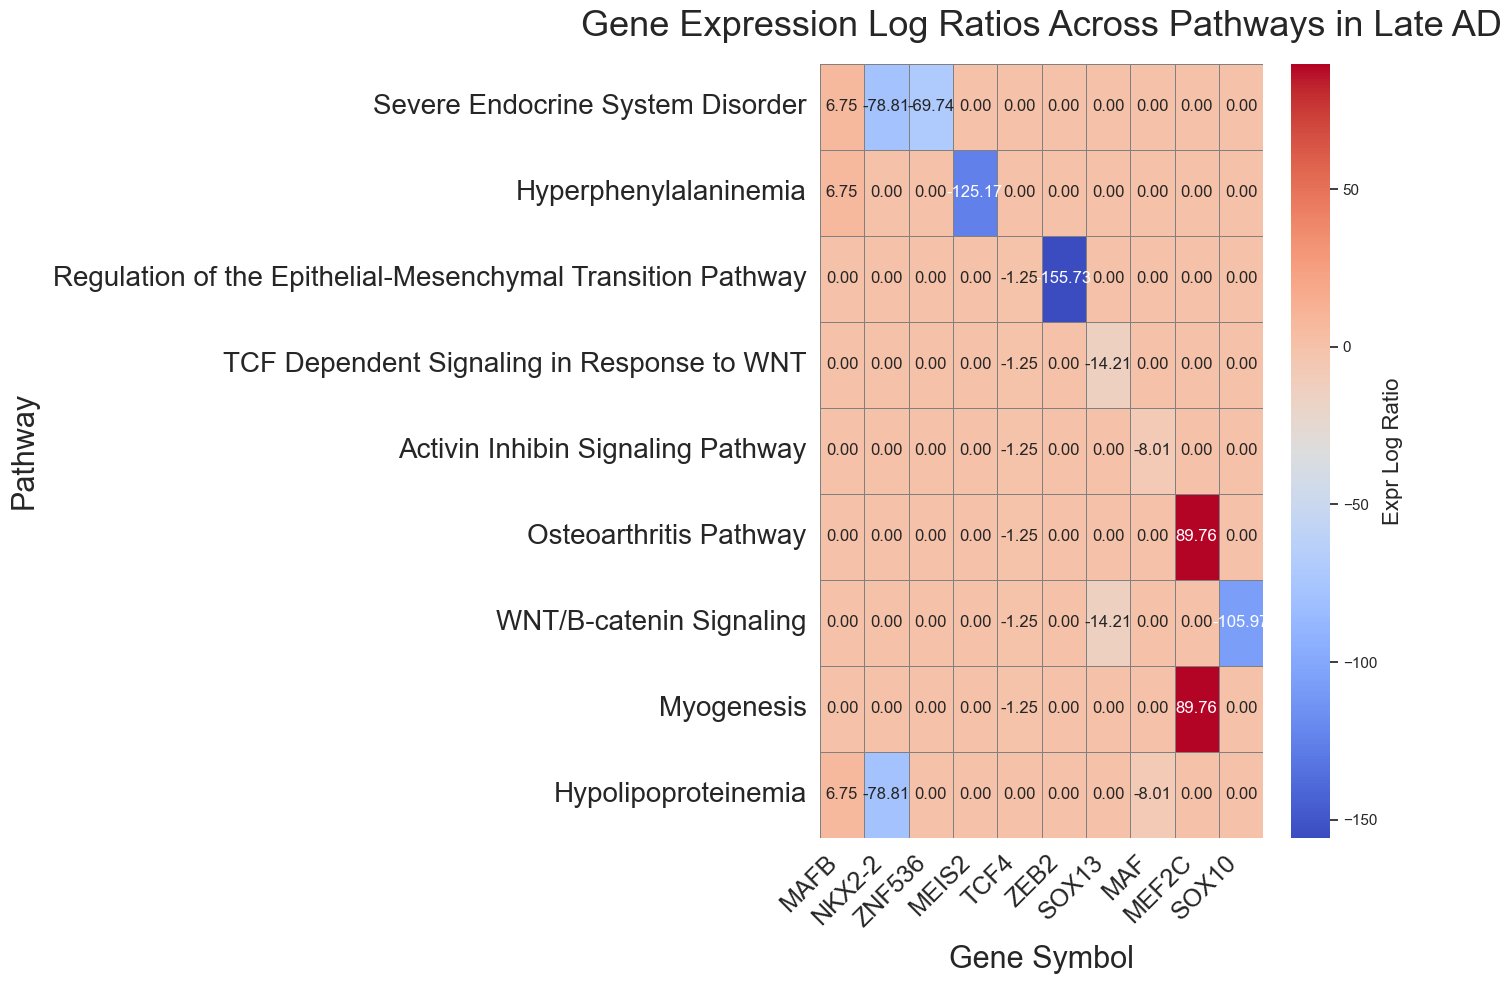

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = {
    'Pathway': [
        'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder',
        'Hyperphenylalaninemia', 'Hyperphenylalaninemia',
        'Regulation of the Epithelial-Mesenchymal Transition Pathway', 'Regulation of the Epithelial-Mesenchymal Transition Pathway',
        'TCF Dependent Signaling in Response to WNT', 'TCF Dependent Signaling in Response to WNT',
        'Activin Inhibin Signaling Pathway', 'Activin Inhibin Signaling Pathway',
        'Osteoarthritis Pathway', 'Osteoarthritis Pathway',
        'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling',
        'Myogenesis', 'Myogenesis',
        'Hypolipoproteinemia', 'Hypolipoproteinemia', 'Hypolipoproteinemia'
    ],
    'Gene Symbol': [
        'MAFB', 'NKX2-2', 'ZNF536',
        'MAFB', 'MEIS2',
        'TCF4', 'ZEB2',
        'SOX13', 'TCF4',
        'MAF', 'TCF4',
        'MEF2C', 'TCF4',
        'SOX10', 'SOX13', 'TCF4',
        'MEF2C', 'TCF4',
        'MAF', 'MAFB', 'NKX2-2'
    ],
    'Expr Log Ratio': [
        6.754, -78.807, -69.742,
        6.754, -125.17,
        -1.252, -155.734,
        -14.214, -1.252,
        -8.012, -1.252,
        89.763, -1.252,
        -105.974, -14.214, -1.252,
        89.763, -1.252,
        -8.012, 6.754, -78.807
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a matrix for the heatmap
pathways = df['Pathway'].unique()
genes = df['Gene Symbol'].unique()
matrix = np.zeros((len(pathways), len(genes)))

for i, pathway in enumerate(pathways):
    for j, gene in enumerate(genes):
        value = df[(df['Pathway'] == pathway) & (df['Gene Symbol'] == gene)]['Expr Log Ratio']
        if not value.empty:
            matrix[i, j] = value.values[0]

# Create DataFrame for the heatmap
heatmap_df = pd.DataFrame(matrix, index=pathways, columns=genes)

# Set up the figure and color map
plt.figure(figsize=(14, 10))
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the heatmap
heatmap = sns.heatmap(heatmap_df, cmap=cmap, annot=True, fmt='.2f', cbar_kws={'label': 'Expr Log Ratio'}, linewidths=0.5, linecolor='gray')

# Customize the plot for a polished look
plt.title("Gene Expression Log Ratios Across Pathways in Late AD", fontsize=26, pad=20)
plt.xlabel("Gene Symbol", fontsize=22, labelpad=10)
plt.ylabel("Pathway", fontsize=22, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=20)

# Add a colorbar with label
cbar = heatmap.collections[0].colorbar
cbar.set_label("Expr Log Ratio", fontsize=16)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


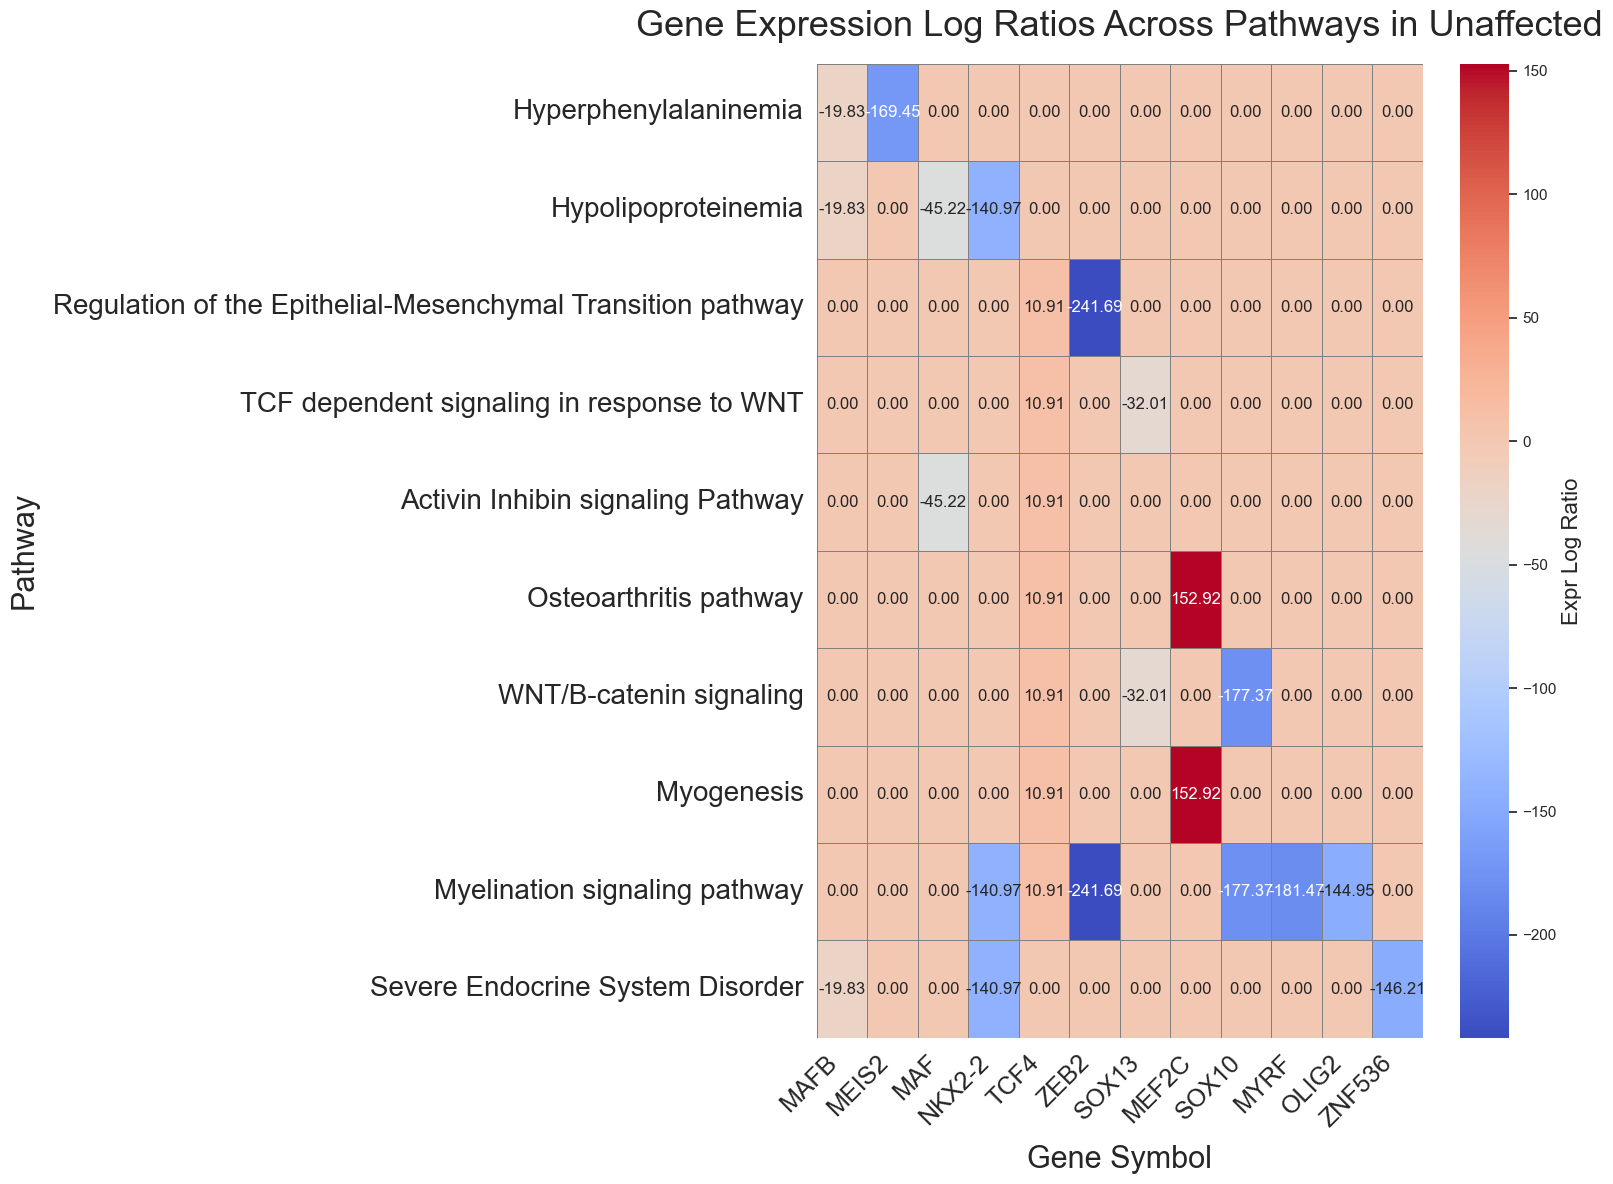

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the corrected data
data = {
    'Pathway': [
        'Hyperphenylalaninemia', 'Hyperphenylalaninemia',
        'Hypolipoproteinemia', 'Hypolipoproteinemia', 'Hypolipoproteinemia',
        'Regulation of the Epithelial-Mesenchymal Transition pathway', 'Regulation of the Epithelial-Mesenchymal Transition pathway',
        'TCF dependent signaling in response to WNT', 'TCF dependent signaling in response to WNT',
        'Activin Inhibin signaling Pathway', 'Activin Inhibin signaling Pathway',
        'Osteoarthritis pathway', 'Osteoarthritis pathway',
        'WNT/B-catenin signaling', 'WNT/B-catenin signaling', 'WNT/B-catenin signaling',
        'Myogenesis', 'Myogenesis',
        'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway',
        'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder'
    ],
    'Gene Symbol': [
        'MAFB', 'MEIS2',
        'MAF', 'MAFB', 'NKX2-2',
        'TCF4', 'ZEB2',
        'SOX13', 'TCF4',
        'MAF', 'TCF4',
        'MEF2C', 'TCF4',
        'SOX10', 'SOX13', 'TCF4',
        'MEF2C', 'TCF4',
        'MYRF', 'NKX2-2', 'OLIG2', 'SOX10', 'TCF4', 'ZEB2',
        'MAFB', 'NKX2-2', 'ZNF536'
    ],
    'Expr Log Ratio': [
        -19.832, -169.449,
        -45.222, -19.832, -140.973,
        10.906, -241.695,
        -32.01, 10.906,
        -45.222, 10.906,
        152.922, 10.906,
        -177.365, -32.01, 10.906,
        152.922, 10.906,
        -181.469, -140.973, -144.953, -177.365, 10.906, -241.695,
        -19.832, -140.973, -146.209
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a matrix for the heatmap
pathways = df['Pathway'].unique()
genes = df['Gene Symbol'].unique()
matrix = np.zeros((len(pathways), len(genes)))

for i, pathway in enumerate(pathways):
    for j, gene in enumerate(genes):
        value = df[(df['Pathway'] == pathway) & (df['Gene Symbol'] == gene)]['Expr Log Ratio']
        if not value.empty:
            matrix[i, j] = value.values[0]

# Create DataFrame for the heatmap
heatmap_df = pd.DataFrame(matrix, index=pathways, columns=genes)

# Set up the figure and color map
plt.figure(figsize=(16, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the heatmap
heatmap = sns.heatmap(heatmap_df, cmap=cmap, annot=True, fmt='.2f', cbar_kws={'label': 'Expr Log Ratio'}, linewidths=0.5, linecolor='gray')

# Customize the plot for a polished look
plt.title("Gene Expression Log Ratios Across Pathways in Unaffected", fontsize=26, pad=20)
plt.xlabel("Gene Symbol", fontsize=22, labelpad=10)
plt.ylabel("Pathway", fontsize=22, labelpad=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(fontsize=20)

# Add a colorbar with label
cbar = heatmap.collections[0].colorbar
cbar.set_label("Expr Log Ratio", fontsize=16)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


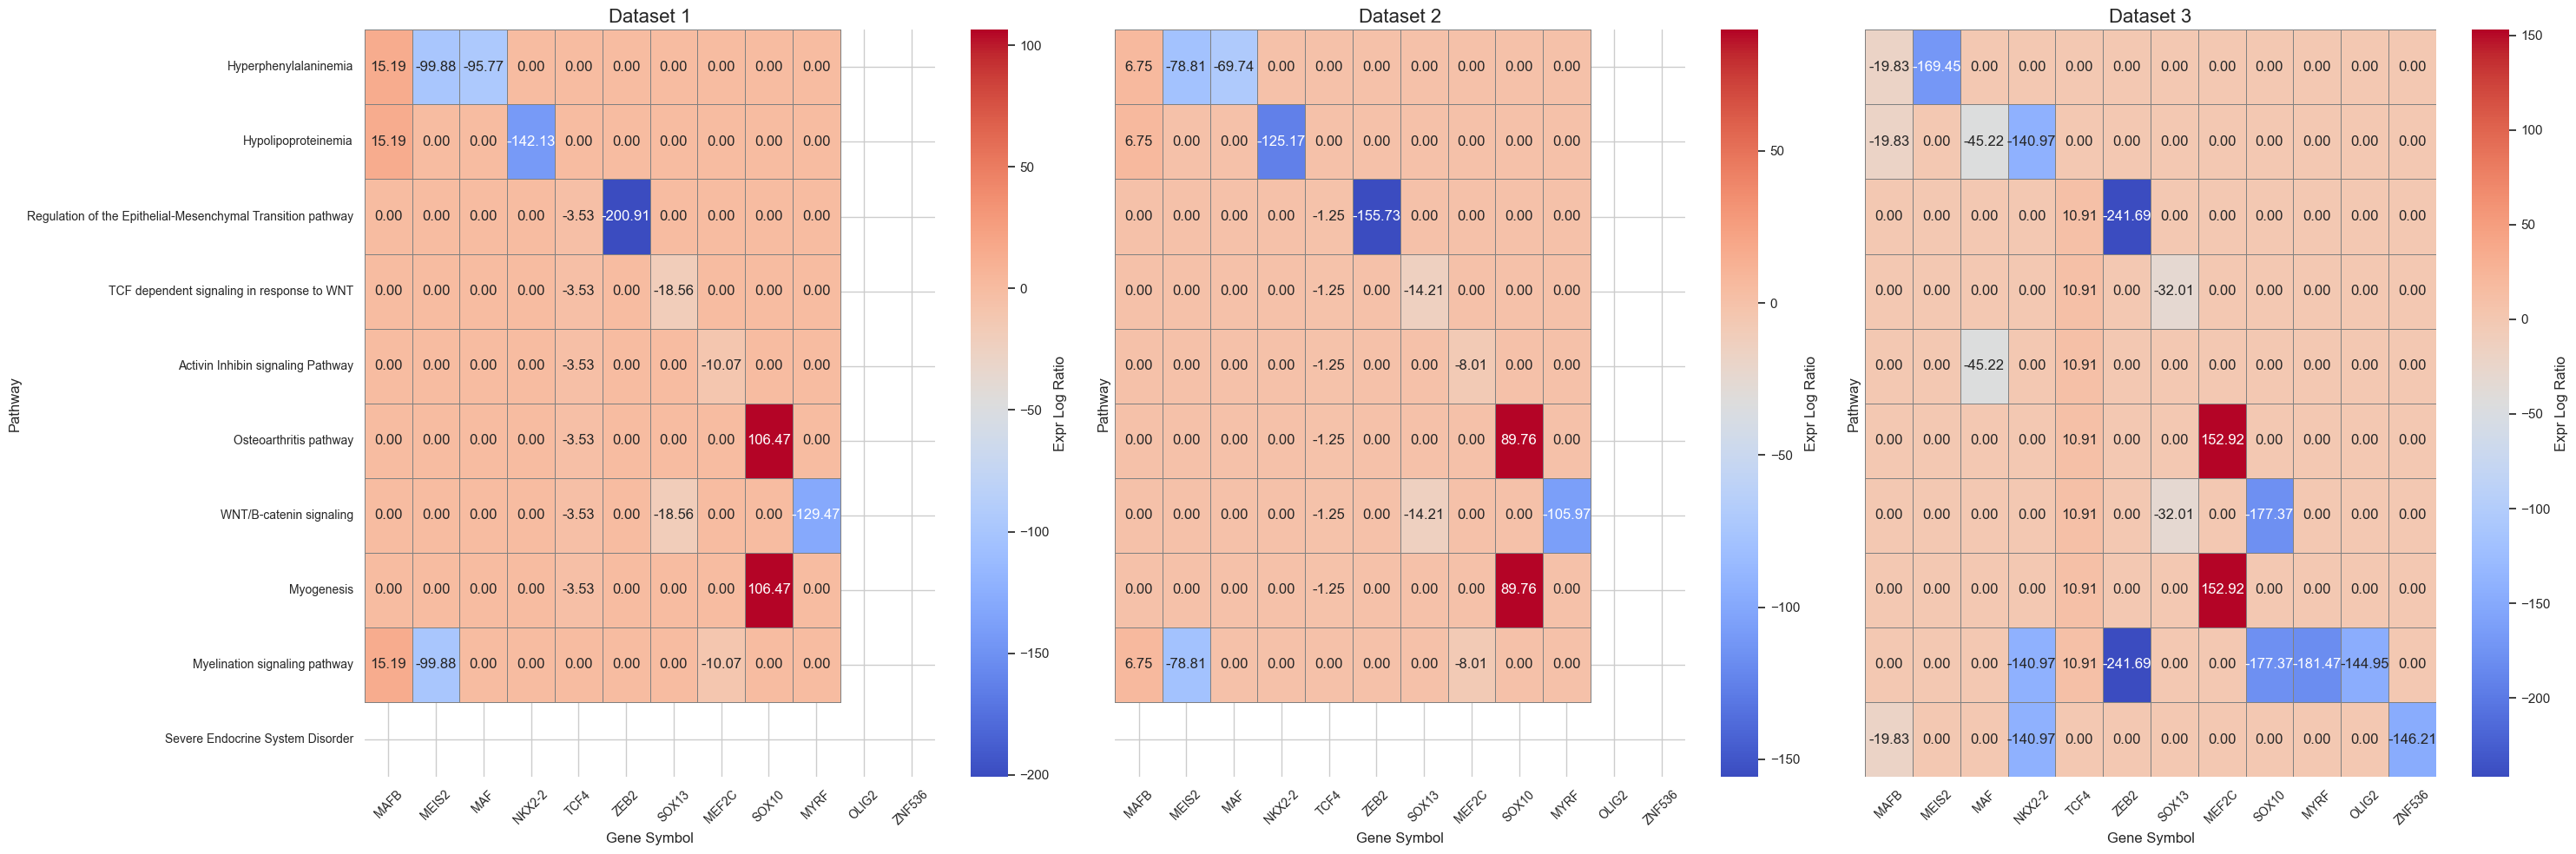

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the three datasets
data1 = {
    'Pathway': [
        'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder',
        'Hyperphenylalaninemia', 'Hyperphenylalaninemia',
        'Regulation of the Epithelial-Mesenchymal Transition Pathway', 'Regulation of the Epithelial-Mesenchymal Transition Pathway',
        'TCF Dependent Signaling in Response to WNT', 'TCF Dependent Signaling in Response to WNT',
        'Activin Inhibin Signaling Pathway', 'Activin Inhibin Signaling Pathway',
        'Osteoarthritis Pathway', 'Osteoarthritis Pathway',
        'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling',
        'Myogenesis', 'Myogenesis',
        'Hypolipoproteinemia', 'Hypolipoproteinemia', 'Hypolipoproteinemia'
    ],
    'Gene Symbol': [
        'MAFB', 'NKX2-2', 'ZNF536',
        'MAFB', 'MEIS2',
        'TCF4', 'ZEB2',
        'SOX13', 'TCF4',
        'MAF', 'TCF4',
        'MEF2C', 'TCF4',
        'SOX10', 'SOX13', 'TCF4',
        'MEF2C', 'TCF4',
        'MAF', 'MAFB', 'NKX2-2'
    ],
    'Expr Log Ratio': [
        15.187, -99.88, -95.765,
        15.187, -142.134,
        -3.531, -200.909,
        -18.559, -3.531,
        -10.07, -3.531,
        106.465, -3.531,
        -129.475, -18.559, -3.531,
        106.465, -3.531,
        -10.07, 15.187, -99.88
    ]
}

data2 = {
    'Pathway': [
        'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder',
        'Hyperphenylalaninemia', 'Hyperphenylalaninemia',
        'Regulation of the Epithelial-Mesenchymal Transition Pathway', 'Regulation of the Epithelial-Mesenchymal Transition Pathway',
        'TCF Dependent Signaling in Response to WNT', 'TCF Dependent Signaling in Response to WNT',
        'Activin Inhibin Signaling Pathway', 'Activin Inhibin Signaling Pathway',
        'Osteoarthritis Pathway', 'Osteoarthritis Pathway',
        'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling',
        'Myogenesis', 'Myogenesis',
        'Hypolipoproteinemia', 'Hypolipoproteinemia', 'Hypolipoproteinemia'
    ],
    'Gene Symbol': [
        'MAFB', 'NKX2-2', 'ZNF536',
        'MAFB', 'MEIS2',
        'TCF4', 'ZEB2',
        'SOX13', 'TCF4',
        'MAF', 'TCF4',
        'MEF2C', 'TCF4',
        'SOX10', 'SOX13', 'TCF4',
        'MEF2C', 'TCF4',
        'MAF', 'MAFB', 'NKX2-2'
    ],
    'Expr Log Ratio': [
        6.754, -78.807, -69.742,
        6.754, -125.17,
        -1.252, -155.734,
        -14.214, -1.252,
        -8.012, -1.252,
        89.763, -1.252,
        -105.974, -14.214, -1.252,
        89.763, -1.252,
        -8.012, 6.754, -78.807
    ]
}

data3 = {
    'Pathway': [
        'Hyperphenylalaninemia', 'Hyperphenylalaninemia',
        'Hypolipoproteinemia', 'Hypolipoproteinemia', 'Hypolipoproteinemia',
        'Regulation of the Epithelial-Mesenchymal Transition pathway', 'Regulation of the Epithelial-Mesenchymal Transition pathway',
        'TCF dependent signaling in response to WNT', 'TCF dependent signaling in response to WNT',
        'Activin Inhibin signaling Pathway', 'Activin Inhibin signaling Pathway',
        'Osteoarthritis pathway', 'Osteoarthritis pathway',
        'WNT/B-catenin signaling', 'WNT/B-catenin signaling', 'WNT/B-catenin signaling',
        'Myogenesis', 'Myogenesis',
        'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway',
        'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder'
    ],
    'Gene Symbol': [
        'MAFB', 'MEIS2',
        'MAF', 'MAFB', 'NKX2-2',
        'TCF4', 'ZEB2',
        'SOX13', 'TCF4',
        'MAF', 'TCF4',
        'MEF2C', 'TCF4',
        'SOX10', 'SOX13', 'TCF4',
        'MEF2C', 'TCF4',
        'MYRF', 'NKX2-2', 'OLIG2', 'SOX10', 'TCF4', 'ZEB2',
        'MAFB', 'NKX2-2', 'ZNF536'
    ],
    'Expr Log Ratio': [
        -19.832, -169.449,
        -45.222, -19.832, -140.973,
        10.906, -241.695,
        -32.01, 10.906,
        -45.222, 10.906,
        152.922, 10.906,
        -177.365, -32.01, 10.906,
        152.922, 10.906,
        -181.469, -140.973, -144.953, -177.365, 10.906, -241.695,
        -19.832, -140.973, -146.209
    ]
}

def create_heatmap(data, title, ax):
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Create a matrix for the heatmap
    pathways = df['Pathway'].unique()
    genes = df['Gene Symbol'].unique()
    matrix = np.zeros((len(pathways), len(genes)))

    for i, pathway in enumerate(pathways):
        for j, gene in enumerate(genes):
            value = df[(df['Pathway'] == pathway) & (df['Gene Symbol'] == gene)]['Expr Log Ratio']
            if not value.empty:
                matrix[i, j] = value.values[0]

    # Create DataFrame for the heatmap
    heatmap_df = pd.DataFrame(matrix, index=pathways, columns=genes)
    
    # Create the heatmap
    sns.heatmap(heatmap_df, cmap="coolwarm", annot=True, fmt='.2f', cbar_kws={'label': 'Expr Log Ratio'}, linewidths=0.5, linecolor='gray', ax=ax)
    
    # Customize the plot
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Gene Symbol", fontsize=12)
    ax.set_ylabel("Pathway", fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

# Set up the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 10), sharex=True, sharey=True)

# Create the heatmaps
create_heatmap(data1, "Dataset 1", axs[0])
create_heatmap(data2, "Dataset 2", axs[1])
create_heatmap(data3, "Dataset 3", axs[2])

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


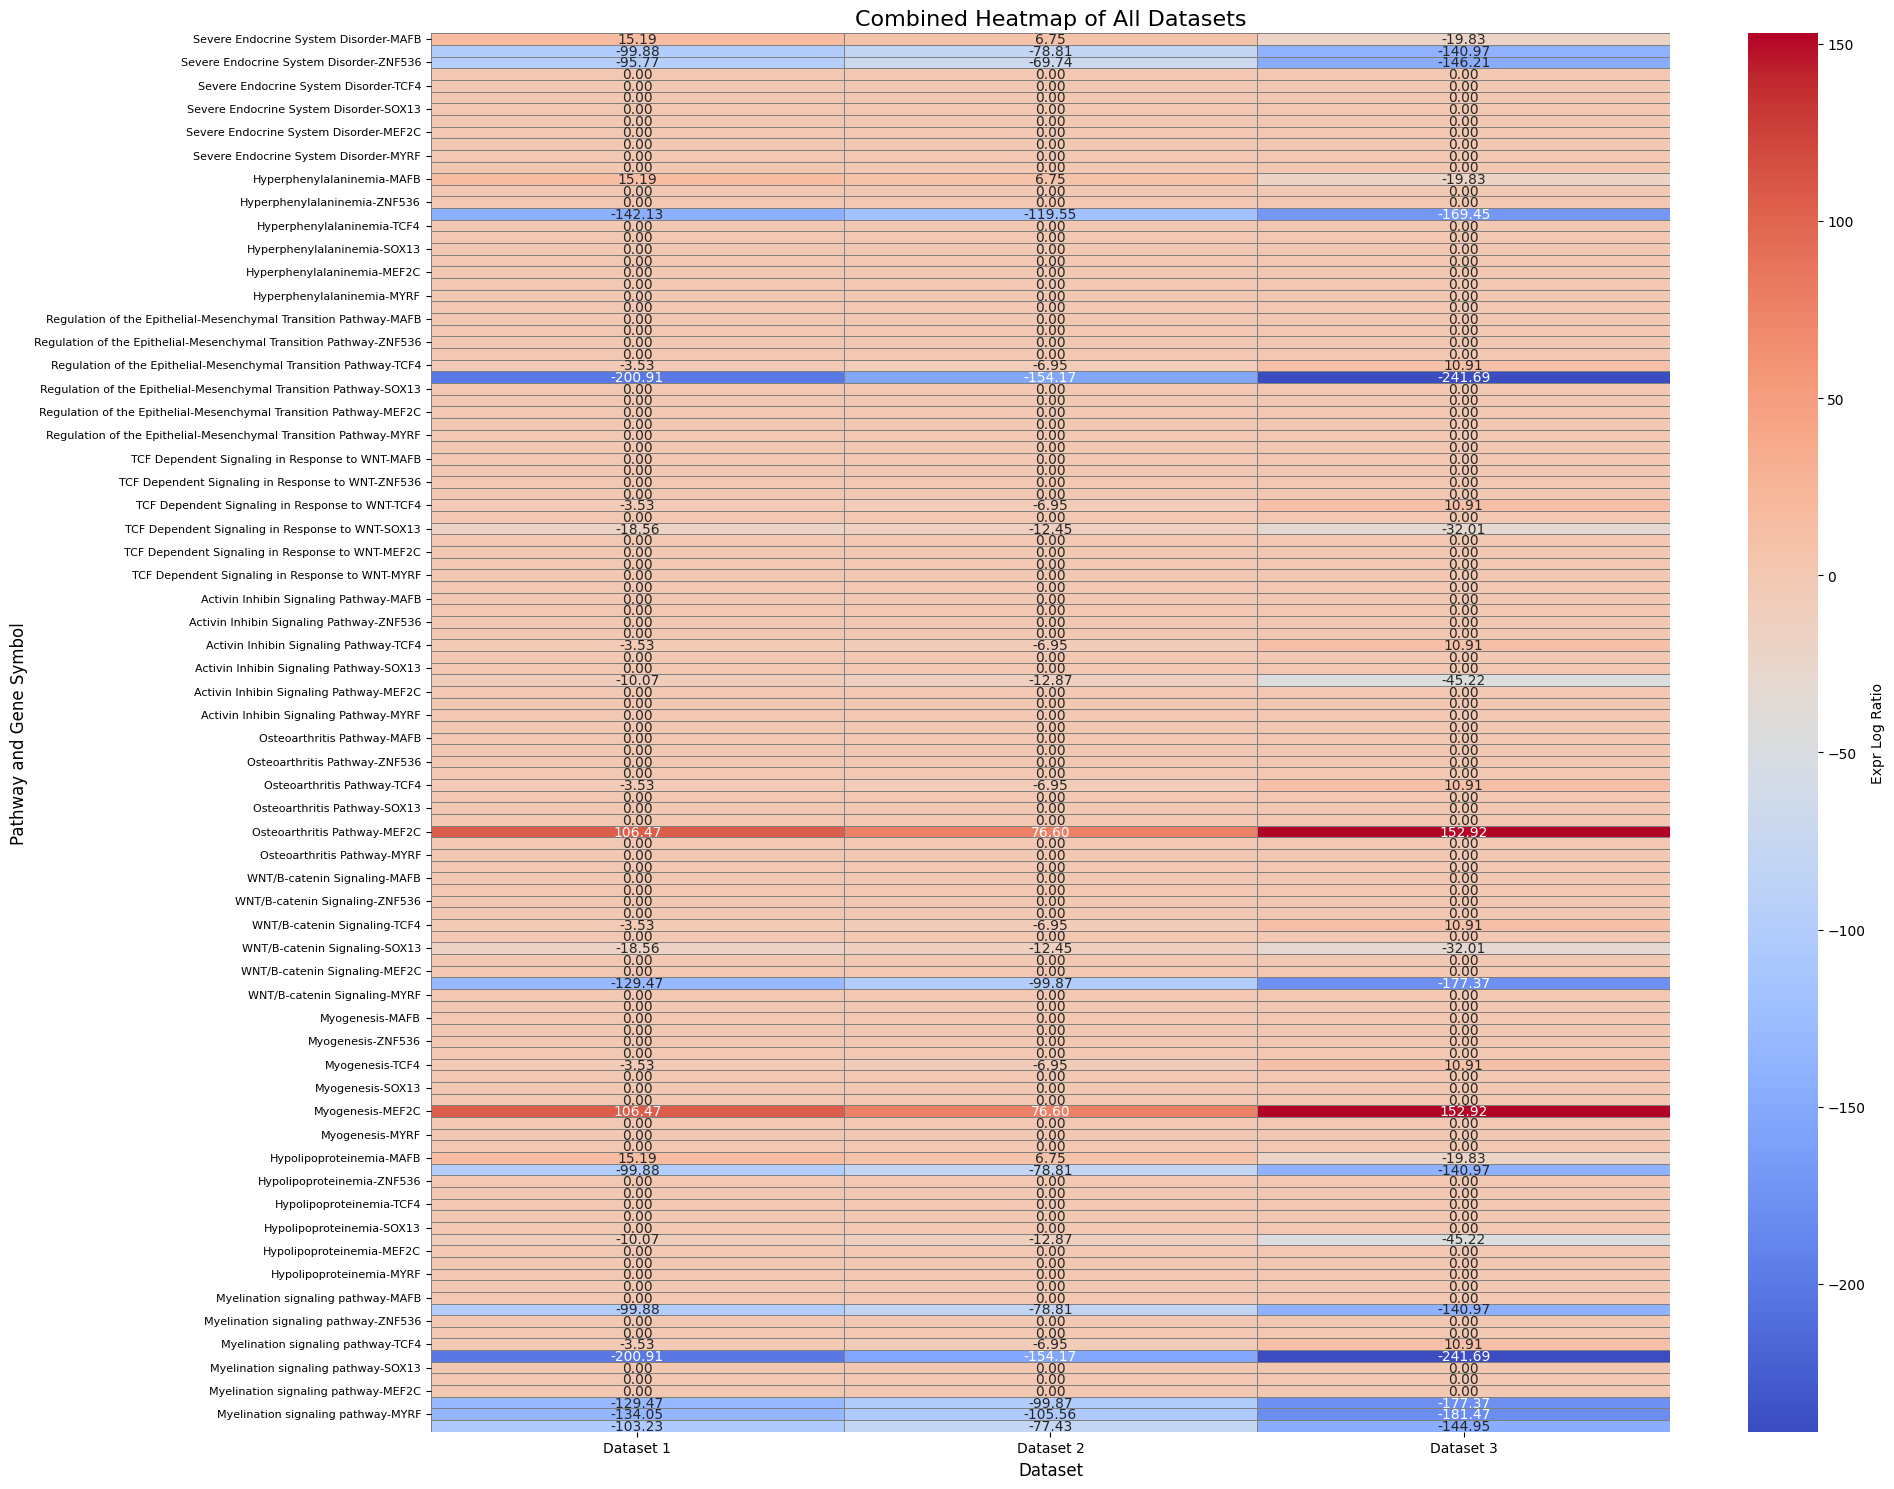

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the three datasets
data1 = {
    'Pathway': [
        'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder',
        'Hyperphenylalaninemia', 'Hyperphenylalaninemia',
        'Regulation of the Epithelial-Mesenchymal Transition Pathway', 'Regulation of the Epithelial-Mesenchymal Transition Pathway',
        'TCF Dependent Signaling in Response to WNT', 'TCF Dependent Signaling in Response to WNT',
        'Activin Inhibin Signaling Pathway', 'Activin Inhibin Signaling Pathway',
        'Osteoarthritis Pathway', 'Osteoarthritis Pathway',
        'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling',
        'Myogenesis', 'Myogenesis',
        'Hypolipoproteinemia', 'Hypolipoproteinemia', 'Hypolipoproteinemia',
        'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway'
    ],
    'Gene Symbol': [
        'MAFB', 'NKX2-2', 'ZNF536',
        'MAFB', 'MEIS2',
        'TCF4', 'ZEB2',
        'SOX13', 'TCF4',
        'MAF', 'TCF4',
        'MEF2C', 'TCF4',
        'SOX10', 'SOX13', 'TCF4',
        'MEF2C', 'TCF4',
        'MAF', 'MAFB', 'NKX2-2',
        'MYRF', 'NKX2-2', 'OLIG2', 'SOX10', 'TCF4', 'ZEB2'
    ],
    'Expr Log Ratio': [
        15.187, -99.88, -95.765,
        15.187, -142.134,
        -3.531, -200.909,
        -18.559, -3.531,
        -10.07, -3.531,
        106.465, -3.531,
        -129.475, -18.559, -3.531,
        106.465, -3.531,
        -10.07, 15.187, -99.88,
        -134.051, -99.88, -103.232, -129.475, -3.531, -200.909
    ]
}

data2 = {
    'Pathway': [
        'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder',
        'Hyperphenylalaninemia', 'Hyperphenylalaninemia',
        'Regulation of the Epithelial-Mesenchymal Transition Pathway', 'Regulation of the Epithelial-Mesenchymal Transition Pathway',
        'TCF Dependent Signaling in Response to WNT', 'TCF Dependent Signaling in Response to WNT',
        'Activin Inhibin Signaling Pathway', 'Activin Inhibin Signaling Pathway',
        'Osteoarthritis Pathway', 'Osteoarthritis Pathway',
        'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling',
        'Myogenesis', 'Myogenesis',
        'Hypolipoproteinemia', 'Hypolipoproteinemia', 'Hypolipoproteinemia', 
        'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway',
    ],
    'Gene Symbol': [
        'MAFB', 'NKX2-2', 'ZNF536',
        'MAFB', 'MEIS2',
        'TCF4', 'ZEB2',
        'SOX13', 'TCF4',
        'MAF', 'TCF4',
        'MEF2C', 'TCF4',
        'SOX10', 'SOX13', 'TCF4',
        'MEF2C', 'TCF4',
        'MAF', 'MAFB', 'NKX2-2',
        'MYRF', 'NKX2-2', 'OLIG2', 'SOX10', 'TCF4', 'ZEB2'
    ],
    'Expr Log Ratio': [
        6.754, -78.807, -69.742,
        6.754, -119.545,
        -6.946, -154.171,
        -12.452, -6.946,
        -12.873, -6.946,
        76.599, -6.946,
        -99.871, -12.452, -6.946,
        76.599, -6.946,
        -12.873, 6.754, -78.807, 
        -105.559, -78.807, -77.426, -99.871, -6.946, -154.171
    ]
}


data3 = pd.DataFrame({
    'Pathway': [
        'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder', 'Severe Endocrine System Disorder',
        'Hyperphenylalaninemia', 'Hyperphenylalaninemia',
        'Regulation of the Epithelial-Mesenchymal Transition Pathway', 'Regulation of the Epithelial-Mesenchymal Transition Pathway',
        'TCF Dependent Signaling in Response to WNT', 'TCF Dependent Signaling in Response to WNT',
        'Activin Inhibin Signaling Pathway', 'Activin Inhibin Signaling Pathway',
        'Osteoarthritis Pathway', 'Osteoarthritis Pathway',
        'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling', 'WNT/B-catenin Signaling',
        'Myogenesis', 'Myogenesis',
        'Hypolipoproteinemia', 'Hypolipoproteinemia', 'Hypolipoproteinemia',
        'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway', 'Myelination signaling pathway'
    ],
    'Gene Symbol': [
        'MAFB', 'NKX2-2', 'ZNF536',
        'MAFB', 'MEIS2',
        'TCF4', 'ZEB2',
        'SOX13', 'TCF4',
        'MAF', 'TCF4',
        'MEF2C', 'TCF4',
        'SOX10', 'SOX13', 'TCF4',
        'MEF2C', 'TCF4',
        'MAF', 'MAFB', 'NKX2-2',
        'MYRF', 'NKX2-2', 'OLIG2', 'SOX10', 'TCF4', 'ZEB2'
    ],
    'Expr Log Ratio': [
        -19.832, -140.973, -146.209,
        -19.832, -169.449,
        10.906, -241.695,
        -32.01, 10.906,
        -45.222, 10.906,
        152.922, 10.906,
        -177.365, -32.01, 10.906,
        152.922, 10.906,
        -45.222, -19.832, -140.973,
        -181.469, -140.973, -144.953, -177.365, 10.906, -241.695
    ]
})

# Concatenate all datasets
data_combined = pd.concat([pd.DataFrame(data1), pd.DataFrame(data2), pd.DataFrame(data3)], ignore_index=True)

# Create a matrix for the heatmap
pathways = data_combined['Pathway'].unique()
genes = data_combined['Gene Symbol'].unique()
matrix = np.zeros((len(pathways), len(genes), 3))  # Three layers for the three datasets

for idx, dataset in enumerate([data1, data2, data3]):
    df = pd.DataFrame(dataset)
    for i, pathway in enumerate(pathways):
        for j, gene in enumerate(genes):
            value = df[(df['Pathway'] == pathway) & (df['Gene Symbol'] == gene)]['Expr Log Ratio']
            if not value.empty:
                matrix[i, j, idx] = value.values[0]

# Combine the matrices into one heatmap by flattening
combined_matrix = matrix.reshape(-1, 3)

# Create DataFrame for the combined heatmap
heatmap_df = pd.DataFrame(combined_matrix, index=pd.MultiIndex.from_product([pathways, genes], names=['Pathway', 'Gene Symbol']))

# Plot the combined heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(heatmap_df, cmap="coolwarm", annot=True, fmt='.2f', cbar_kws={'label': 'Expr Log Ratio'}, linewidths=0.5, linecolor='gray')

plt.title("Combined Heatmap of All Datasets", fontsize=16)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("Pathway and Gene Symbol", fontsize=12)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Dataset 1", "Dataset 2", "Dataset 3"], fontsize=10)
plt.yticks(rotation=0, fontsize=8)

plt.tight_layout()
plt.show()


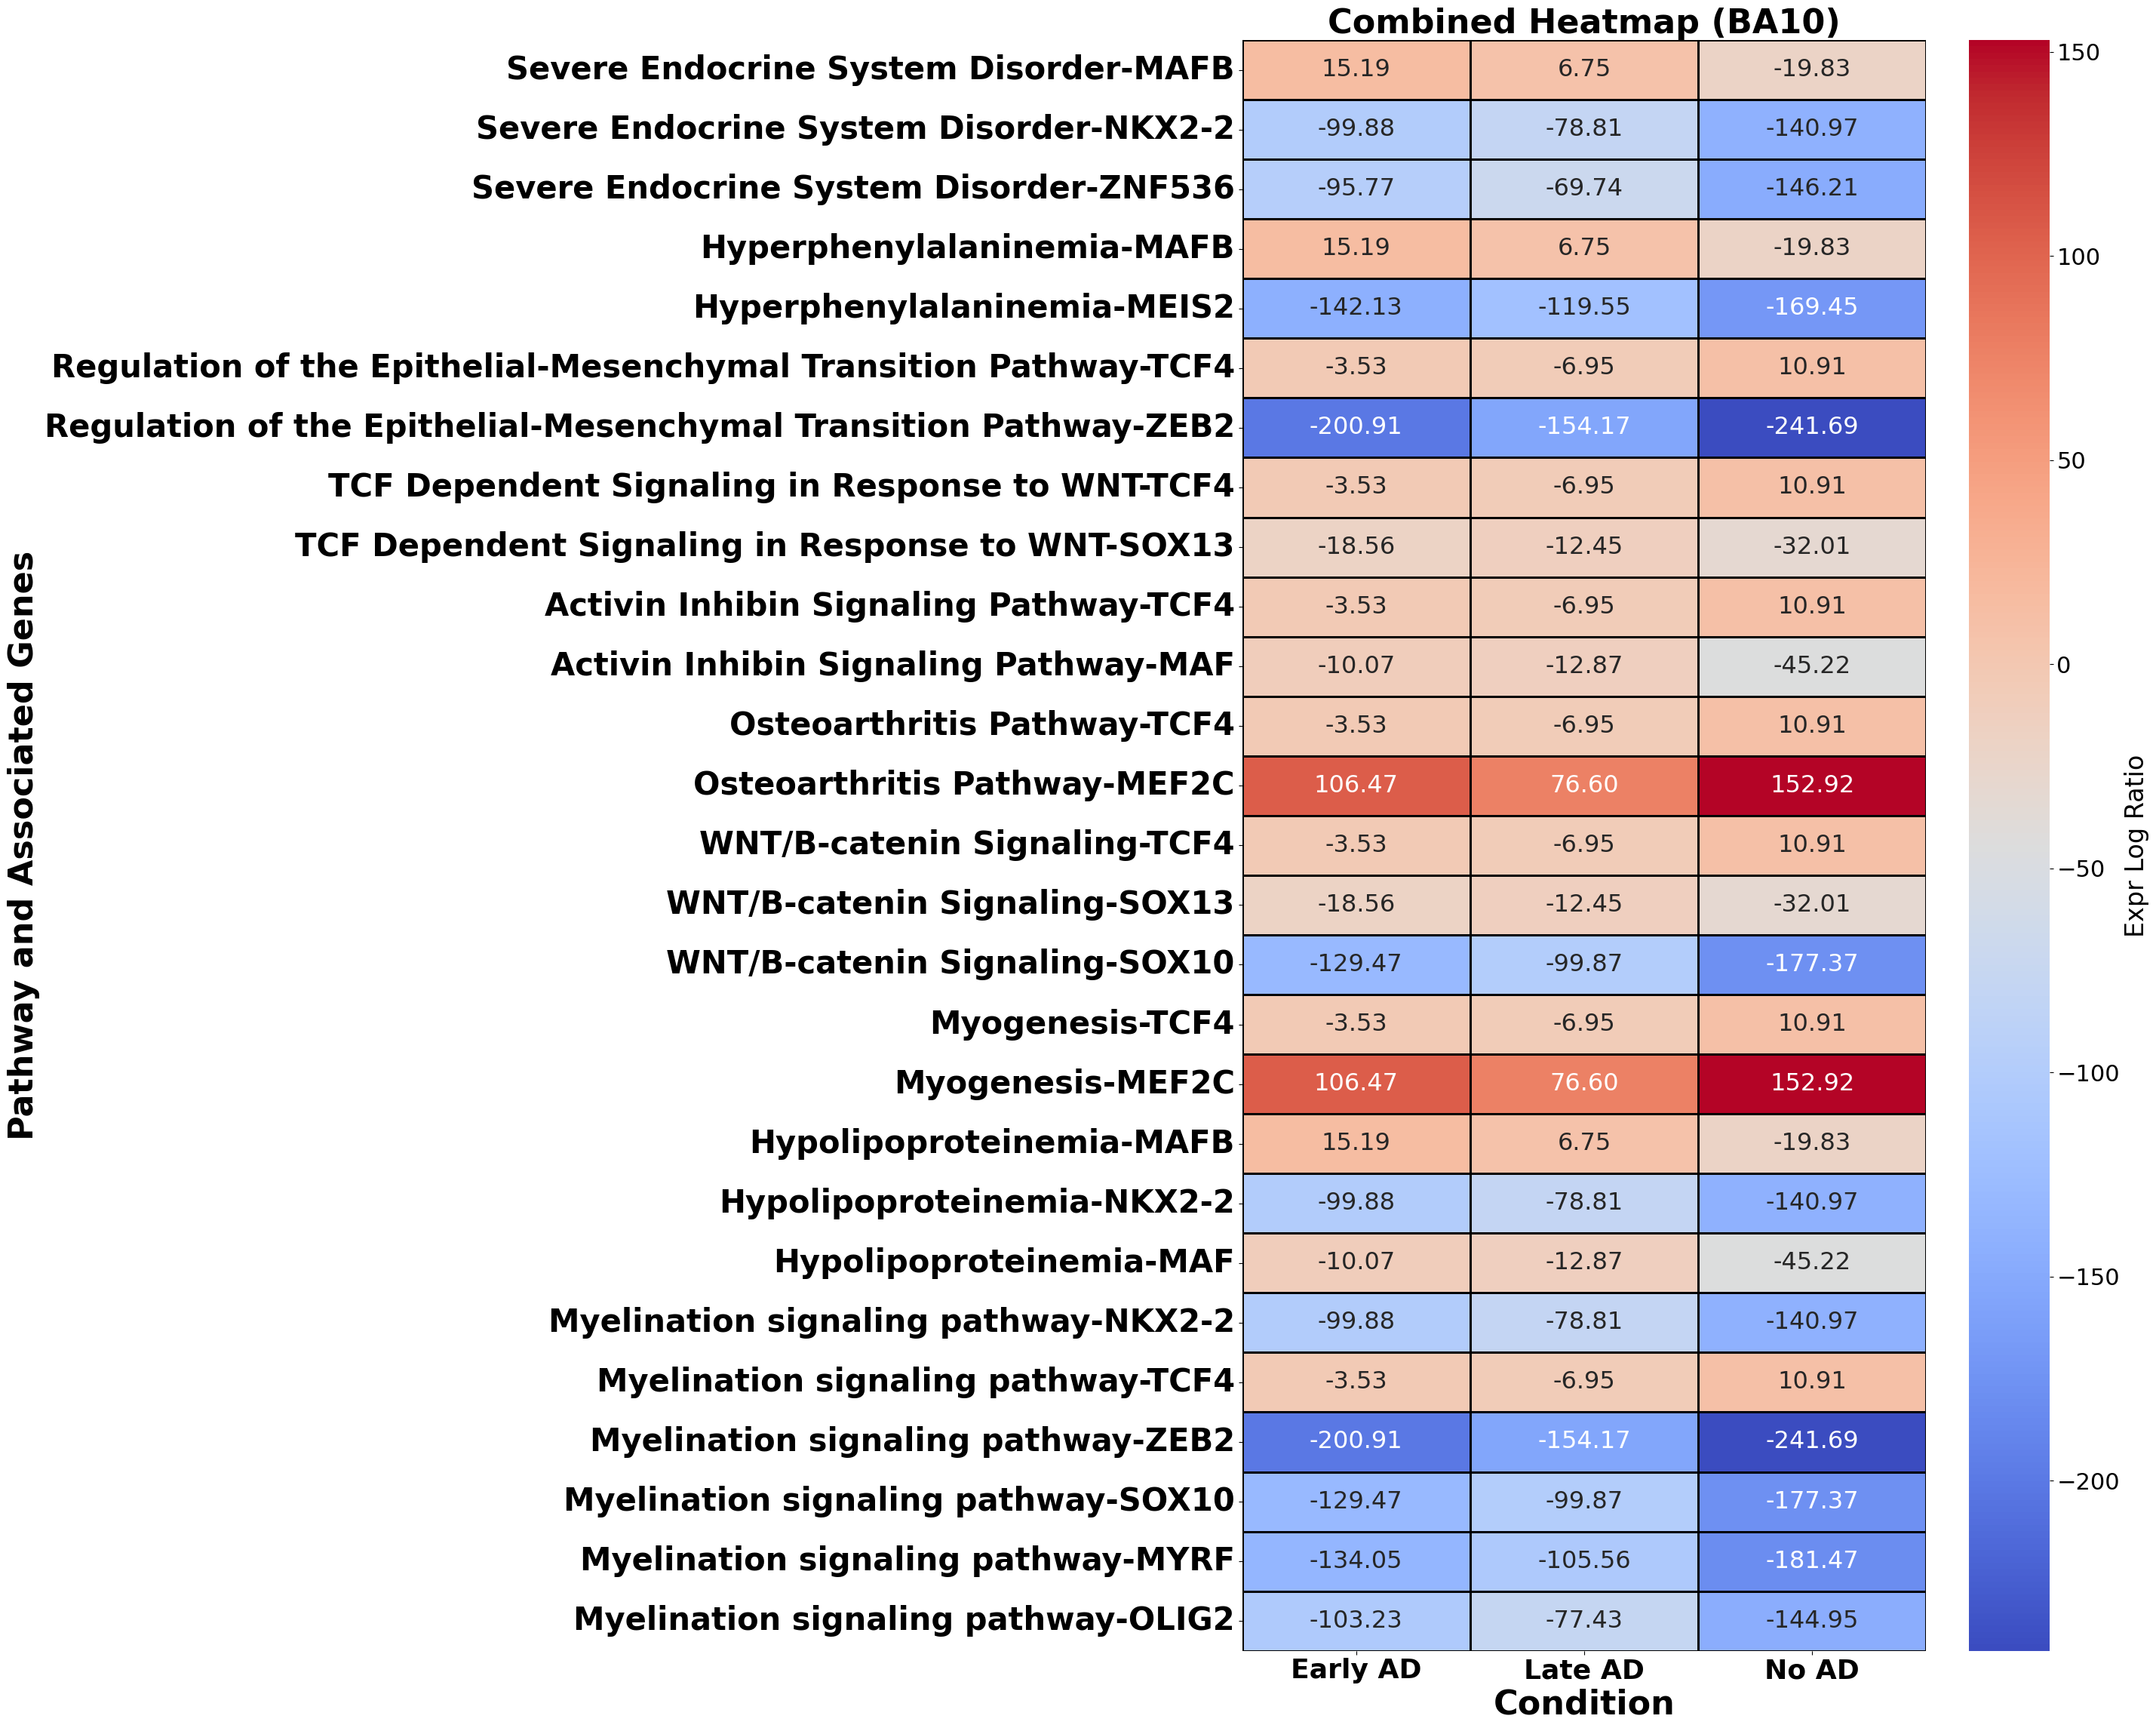

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the three datasets (same as before)

# Concatenate all datasets
data_combined = pd.concat([pd.DataFrame(data1), pd.DataFrame(data2), pd.DataFrame(data3)], ignore_index=True)

# Create a matrix for the heatmap
pathways = data_combined['Pathway'].unique()
genes = data_combined['Gene Symbol'].unique()
matrix = np.zeros((len(pathways), len(genes), 3))  # Three layers for the three datasets

for idx, dataset in enumerate([data1, data2, data3]):
    df = pd.DataFrame(dataset)
    for i, pathway in enumerate(pathways):
        for j, gene in enumerate(genes):
            value = df[(df['Pathway'] == pathway) & (df['Gene Symbol'] == gene)]['Expr Log Ratio']
            if not value.empty:
                matrix[i, j, idx] = value.values[0]

# Combine the matrices into one heatmap by flattening
combined_matrix = matrix.reshape(-1, 3)

# Create DataFrame for the combined heatmap
heatmap_df = pd.DataFrame(combined_matrix, index=pd.MultiIndex.from_product([pathways, genes], names=['Pathway', 'Gene Symbol']))

# Remove rows where all three values are zero
heatmap_df = heatmap_df[(heatmap_df != 0).any(axis=1)]

# Plot the combined heatmap with improvements
plt.figure(figsize=(28, 23))  # Larger figure for better visibility
ax = sns.heatmap(
    heatmap_df, 
    cmap="coolwarm", 
    annot=True, 
    fmt='.2f', 
    cbar_kws={'label': 'Expr Log Ratio'}, 
    linewidths=0.75, 
    linecolor='black', 
    annot_kws={"size": 23}  # Larger annotation text
)

# Adjust colorbar label font size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)  # Increase font size of color bar ticks
cbar.set_label('Expr Log Ratio', fontsize=24)

# Improve title, labels, and ticks visibility
plt.title("Combined Heatmap (BA10)", fontsize=32, weight='bold')
plt.xlabel("Condition", fontsize=32, weight='bold')
plt.ylabel("Pathway and Associated Genes", fontsize=32, weight='bold')
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Early AD", "Late AD", "No AD"], fontsize=26, weight='bold')
plt.yticks(rotation=0, fontsize=30, weight='bold')

plt.tight_layout()
plt.show()


In [142]:
import fitz  # PyMuPDF

# Open the PDF
pdf_file = "/Users/martinnwadiugwu/Downloads/ValidationPics/noAD_rosmap_cotfs_network_radial.pdf"
doc = fitz.open(pdf_file)

# Iterate through all pages
for page_num in range(len(doc)):
    page = doc[page_num]
    
    # Extract text from the page
    text_instances = page.search_for("© 2000-2024 QIAGEN. All rights reserved.")  # Look for the trademark symbol (®)
    
    # Remove the instances by drawing white boxes over them
    for inst in text_instances:
        page.add_redact_annot(inst)  # Mark for redaction
        page.apply_redactions()  # Apply the redaction (replace with white space)

# Save the modified PDF
doc.save("clean_noAD.pdf")
doc.close()
